# Importing Libraries


In [21]:
#Importing Libararies

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder



# Data Preprocessing

In [2]:
# Data Preprocessing

df=pd.read_csv("/content/creditcard_2023.csv")

df.head()

df.tail()

df.describe()

df.dtypes

df.info()

df.nunique()

df.memory_usage()

row = df.iloc[5]
row

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20227 entries, 0 to 20226
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      20227 non-null  int64  
 1   V1      20227 non-null  float64
 2   V2      20227 non-null  float64
 3   V3      20227 non-null  float64
 4   V4      20227 non-null  float64
 5   V5      20227 non-null  float64
 6   V6      20227 non-null  float64
 7   V7      20227 non-null  float64
 8   V8      20227 non-null  float64
 9   V9      20227 non-null  float64
 10  V10     20227 non-null  float64
 11  V11     20227 non-null  float64
 12  V12     20227 non-null  float64
 13  V13     20227 non-null  float64
 14  V14     20227 non-null  float64
 15  V15     20227 non-null  float64
 16  V16     20227 non-null  float64
 17  V17     20227 non-null  float64
 18  V18     20227 non-null  float64
 19  V19     20227 non-null  float64
 20  V20     20227 non-null  float64
 21  V21     20227 non-null  float64
 22

,5
id,5.000000
V1,0.025302
V2,-0.140514
V3,1.191138
V4,-0.707979
V5,0.430490
V6,0.458973
V7,0.611050
V8,-0.092629
V9,0.180811


# Finding Null Values

In [3]:
df = df.dropna()
df.isnull().sum()

,0
id,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


#Exploratory Data Analysis

In [6]:
print(df.columns.tolist())


['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


/tmp/ipython-input-10-862326470.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='Set2')


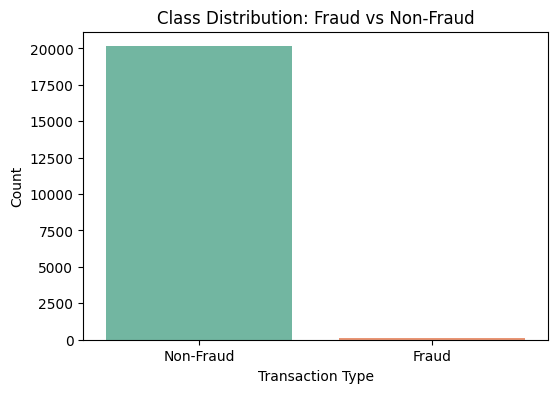

Fraudulent transactions: 0.4252%


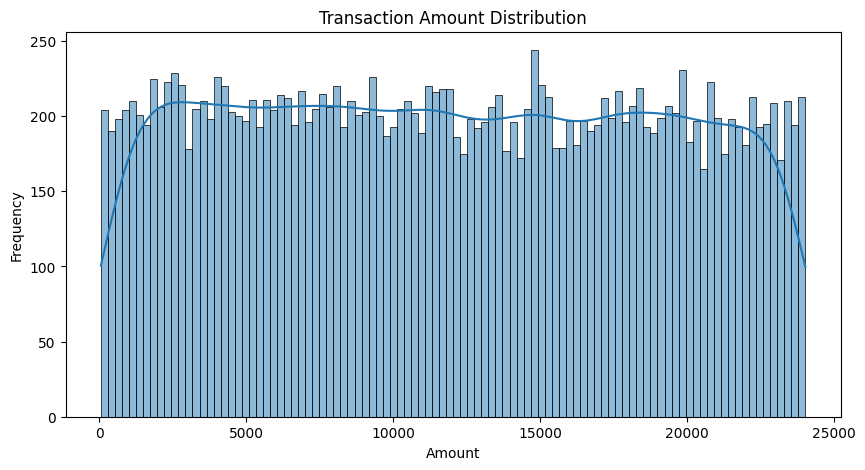

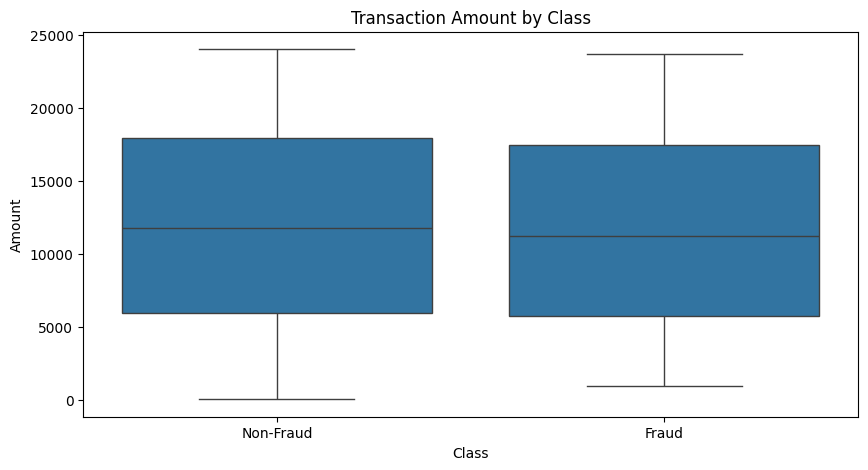

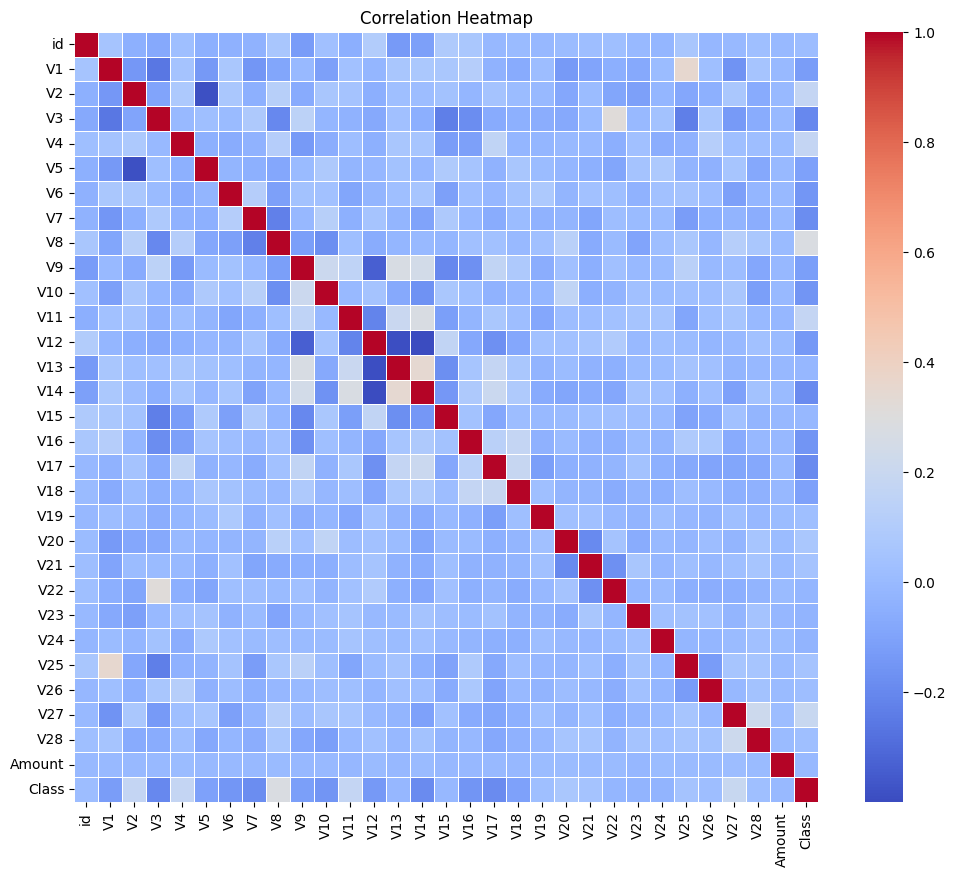

In [10]:
#Class Distribution (Fraud vs Not Fraud)

plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df, palette='Set2')
plt.title('Class Distribution: Fraud vs Non-Fraud')
plt.xticks([0,1], ['Non-Fraud', 'Fraud'])
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

fraud_pct = df['Class'].mean() * 100
print(f"Fraudulent transactions: {fraud_pct:.4f}%")


# Transaction Amount Distribution

plt.figure(figsize=(10,5))
sns.histplot(df['Amount'], bins=100, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class')
plt.xticks([0,1], ['Non-Fraud', 'Fraud'])
plt.show()


# ACorelation Heatmap

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


#Selecting Features and Targeting Variable

In [8]:
x=df.drop(["id","Class"],axis=1,errors="ignore")
y=df["Class"]

print(x.columns.tolist())

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


#Split data into test and train

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

x_train.shape

x_test.shape

(6068, 29)

#Feature Scaling

In [12]:
scaler = StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

print(pd.Series(y_train).value_counts(normalize=True))

Class
0.0    0.995621
1.0    0.004379
Name: proportion, dtype: float64


#5 Fold Cross Validation

In [13]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

cv_scores = cross_val_score(rf_model,x_train_scaled,y_train,cv=3,scoring="f1")
print("\nCross-validation F1 scores:",cv_scores)
print("Average F1 score:",np.mean(cv_scores))


Cross-validation F1 scores: [0.75675676 0.97435897 0.86486486]
Average F1 score: 0.8653268653268653


# Fitting the Model

In [14]:
rf_model.fit(x_train_scaled,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_jobs=-1,
                       random_state=42)

#Prediction

In [15]:
y_pred = rf_model.predict(x_test_scaled)

print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6044
         1.0       0.95      0.79      0.86        24

    accuracy                           1.00      6068
   macro avg       0.97      0.90      0.93      6068
weighted avg       1.00      1.00      1.00      6068



#Confusion Matrix

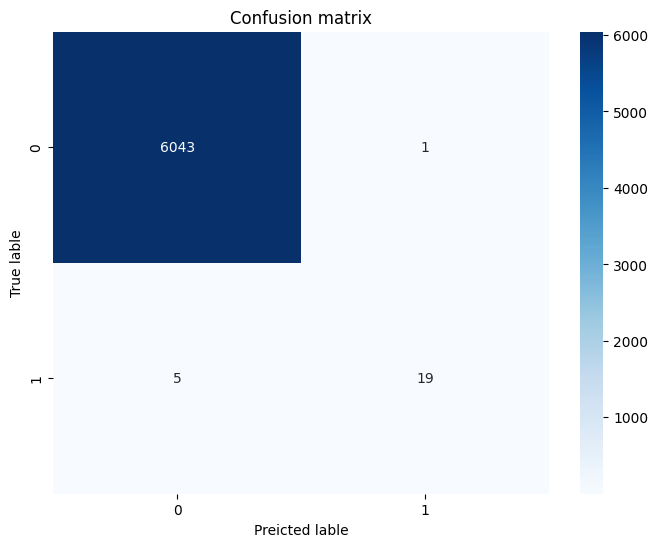

In [16]:
plt.figure(figsize=(8,6))
cm= confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion matrix")
plt.ylabel("True lable")
plt.xlabel("Preicted lable")
plt.show()

#Feature Importance

In [17]:
importance = rf_model.feature_importances_
feature_imp = pd.DataFrame({
    "Feature" : x.columns,
    "Importance" : importance
}).sort_values("Importance",ascending=False)

feature_imp.head()

,Feature,Importance
10,V11,0.129945
11,V12,0.111620
3,V4,0.111557
9,V10,0.110198
16,V17,0.084676


#Visualization of Feature Importance

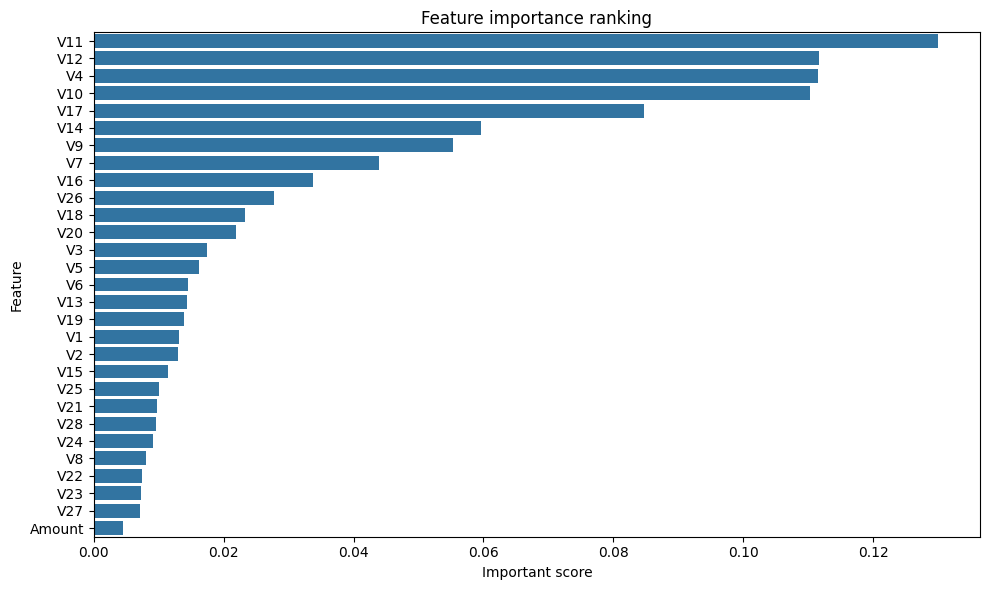

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(data=feature_imp , x="Importance" , y="Feature")
plt.title("Feature importance ranking")
plt.xlabel("Important score")
plt.tight_layout()
plt.show()


#Heat Map

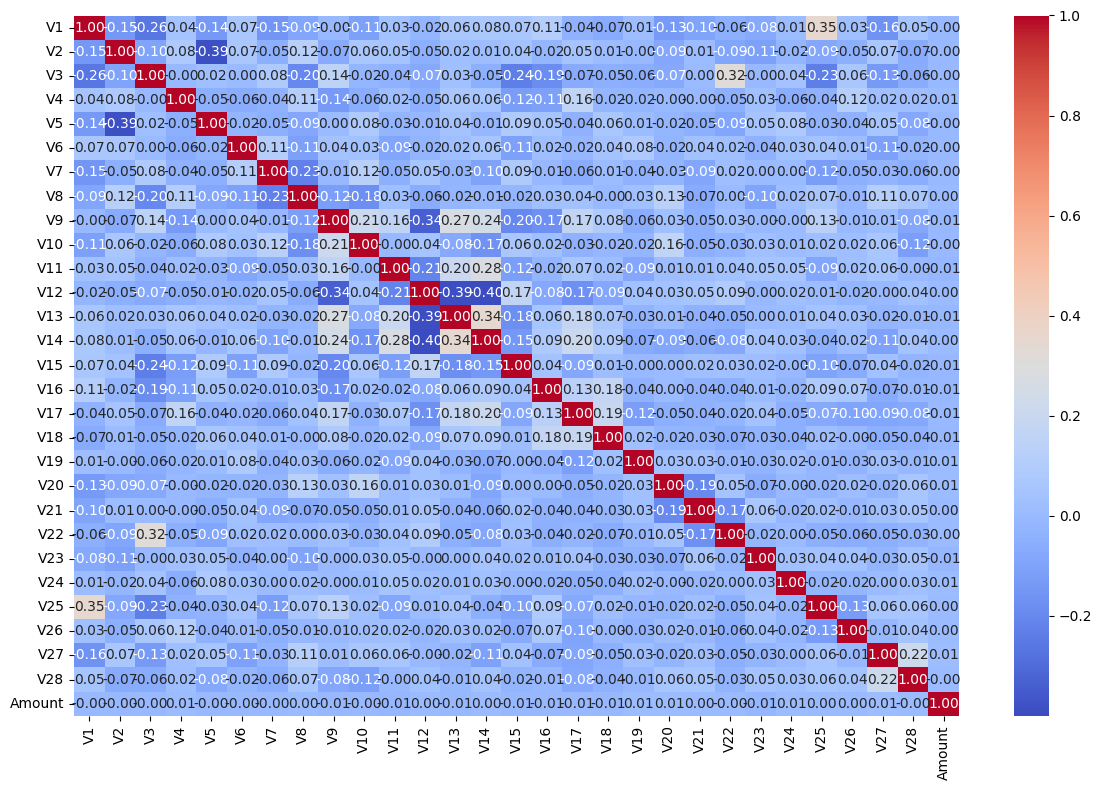

In [19]:
plt.figure(figsize=(12,8))
correlation_matrix = x.corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm")
plt.tight_layout()
plt.show()

#ROC AUC

<function matplotlib.pyplot.show(close=None, block=None)>

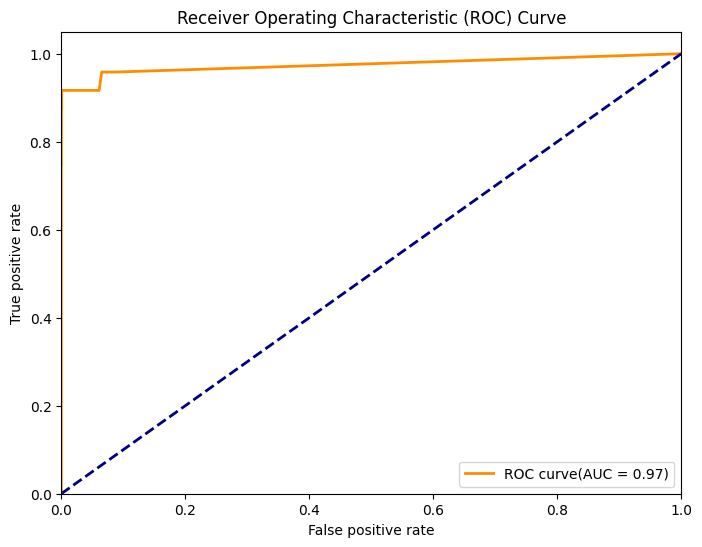

In [20]:
y_pred_proba = rf_model.predict_proba(x_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test,y_pred_proba)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="darkorange", lw=2 ,label=f'ROC curve(AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],color="navy",lw=2,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show


#Save the Model

In [24]:
import joblib
joblib.dump(rf_model, 'ccf_model.pkl')


['ccf_model.pkl']